In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
#Import csv in pandas dataframe
data = pd.read_csv("flipkart_product.csv", encoding='latin1')

In [12]:
#print first 5 rows of the data
data.head(5)

,ProductName,Price,Rate,Review,Summary,Positive,Negative,Neutral
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...,1.0,0.000,0.000
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling,1.0,0.000,0.000
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...,1.0,0.000,0.000
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan,0.0,0.737,0.263
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product,1.0,0.000,0.000


In [34]:
data.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary', 'Positive',
       'Negative', 'Neutral', 'Cluster'],
      dtype='object')

In [40]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45771 entries, 0 to 45770
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductName  45771 non-null  object 
 1   Price        45771 non-null  object 
 2   Rate         45771 non-null  object 
 3   Review       45771 non-null  object 
 4   Summary      45768 non-null  object 
 5   Positive     45771 non-null  float64
 6   Negative     45771 non-null  float64
 7   Neutral      45771 non-null  float64
 8   Cluster      45771 non-null  int32  
dtypes: float64(3), int32(1), object(5)
memory usage: 3.0+ MB


In [41]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Positive,Negative,Neutral,Cluster
count,45771.000000,45771.000000,45771.000000,45771.000000
mean,0.636307,0.064375,0.299317,0.235367
std,0.378032,0.214352,0.327047,0.424233
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.487000,0.000000,0.000000,0.000000
50%,0.756000,0.000000,0.238000,0.000000
75%,1.000000,0.000000,0.400000,0.000000
90%,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [43]:
data.corr

<bound method DataFrame.corr of                                              ProductName     Price Rate  \
0      Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1      Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2      Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3      Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4      Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
...                                                  ...       ...  ...   
45766  WD 1.5 TB Wired External Hard Disk Drive (HDD)...  â¹4,449    3   
45767  WD 1.5 TB Wired External Hard Disk Drive (HDD)...  â¹4,449    4   
45768  WD 1.5 TB Wired External Hard Disk Drive (HDD)...  â¹4,449    1   
45769  WD 1.5 TB Wired External Hard Disk Drive (HDD)...  â¹4,449    5   
45770  WD 1.5 TB Wired External Hard Disk Drive (HDD)...  â¹4,449    5   

                  Review                                            Summary  \
0                  super  Great cooler.. excellent air flow and for this...   
1                awesome             Best budget 2 fit cooler. Nice cooling   
2                   fair  The quality is good but the power of air is de...   
3        useless product                 Very bad product it's a only a fan   
4                   fair                                      Ok ok product   
...                  ...                                                ...   
45766               nice                                            Average   
45767       nice product              Good product , reasonable price range   
45768    useless product        It's detected or not connected by my laptop   
45769  worth every penny                                               Good   
45770     simply awesome                                  It's good Hard di   

       Positive  Negative  Neutral  Cluster  
0         1.000     0.000    0.000        0  
1         1.000     0.000    0.000        0  
2         1.000     0.000    0.000        0  
3         0.000     0.737    0.263        1  
4         1.000     0.000    0.000        0  
...         ...       ...      ...      ...  
45766     1.000     0.000    0.000        0  
45767     0.737     0.000    0.263        0  
45768     0.000     0.737    0.263        1  
45769     0.487     0.000    0.513        0  
45770     0.804     0.000    0.196        0  

[45771 rows x 9 columns]>

In [44]:
data.keys()

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary', 'Positive',
       'Negative', 'Neutral', 'Cluster'],
      dtype='object')

In [11]:
# Perform sentiment analysis
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(review)["pos"] for review in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(review)["neg"] for review in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(review)["neu"] for review in data["Review"]]

In [13]:
#Clean and prepare the columns contining reviews before heading to sentiment analysis
import nltk
import re

nltk.download("stopwords")
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def clean(text):
      text=str(text).lower()
      text=re.sub("\[.*?\]","",text)
      text=re.sub("https?://\S+|www\.\S+","",text)
      text=re.sub("<.*?>+","",text)
      text=re.sub("[%s]"% re.escape(string.punctuation),"",text)
      text=re.sub("\n","",text)
      text=re.sub("\w*\d\w*","",text)
      text=[word for word in text.split(" ") if word not in stopword]
      text=" ".join(text)
      return text

In [14]:
data["Review"] = data["Review"].apply(clean)

In [15]:
data.head(5)

,ProductName,Price,Rate,Review,Summary,Positive,Negative,Neutral
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,super,Great cooler.. excellent air flow and for this...,1.0,0.000,0.000
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,awesome,Best budget 2 fit cooler. Nice cooling,1.0,0.000,0.000
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,The quality is good but the power of air is de...,1.0,0.000,0.000
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,useless product,Very bad product it's a only a fan,0.0,0.737,0.263
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,fair,Ok ok product,1.0,0.000,0.000


In [16]:
#The Rating column of the data contains the ratings given by every reviewer. So lets have a look at how most of the people rate the products they buy from the Flipcart
rating = data["Rate"].value_counts()
numbers=rating.index
quantity=rating.values

In [ ]:
rating

Rate
5                                                             41140
4                                                             15411
1                                                              7452
3                                                              6374
2                                                              2570
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)        1
Name: count, dtype: int64

In [ ]:
numbers

Index(['5', '4', '1', '3', '2',
       'Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)'],
      dtype='object', name='Rate')

In [ ]:
quantity

array([41140, 15411,  7452,  6374,  2570,     1])

In [ ]:
data["Rate"].value_counts()

Rate
5                                                             41140
4                                                             15411
1                                                              7452
3                                                              6374
2                                                              2570
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)        1
Name: count, dtype: int64

In [ ]:
data["Rate"].value_counts() == 1

Rate
5                                                             False
4                                                             False
1                                                             False
3                                                             False
2                                                             False
Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)     True
Name: count, dtype: bool

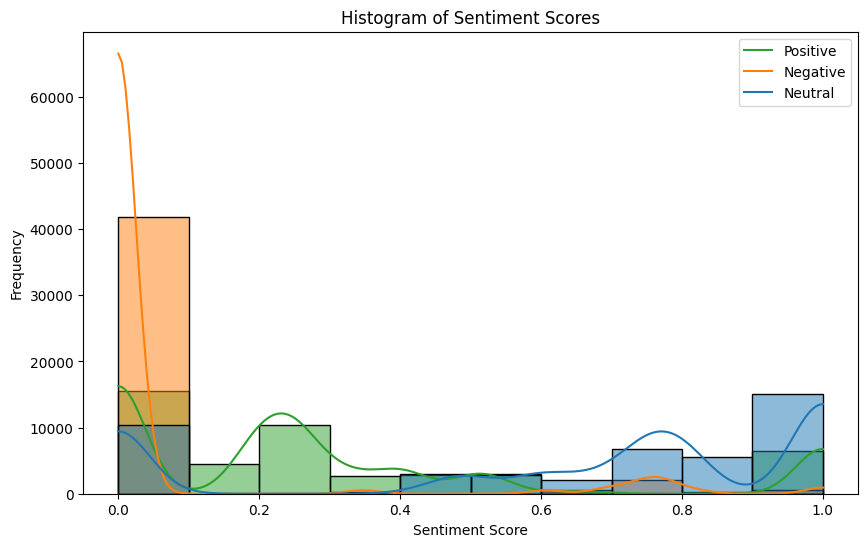

In [17]:
# Plotting sentiment analysis results
# Histogram of Positive, Negative, and Neutral sentiments
plt.figure(figsize=(10, 6))
sns.histplot(data[['Positive', 'Negative', 'Neutral']], bins=10, kde=True, color=['green', 'red', 'gray'])
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.show()


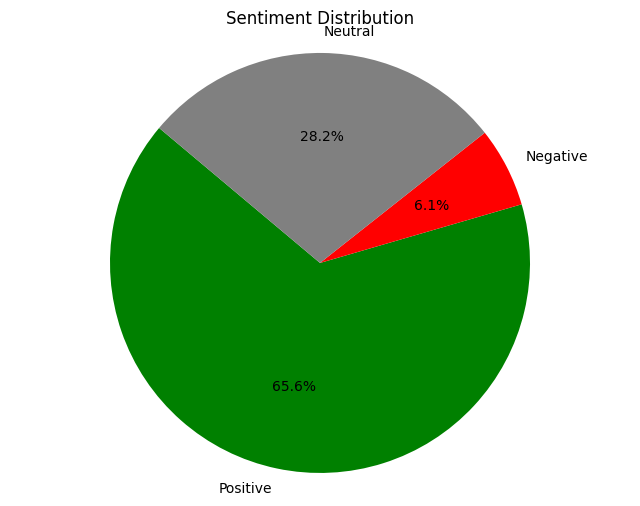

In [ ]:
# Pie chart of sentiment distribution
sentiment_counts = [sum(data["Positive"]), sum(data["Negative"]), sum(data["Neutral"])]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

<ipython-input-22-ee28d2149b3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_labels, y=sentiment_counts, palette=['green', 'red', 'gray'])


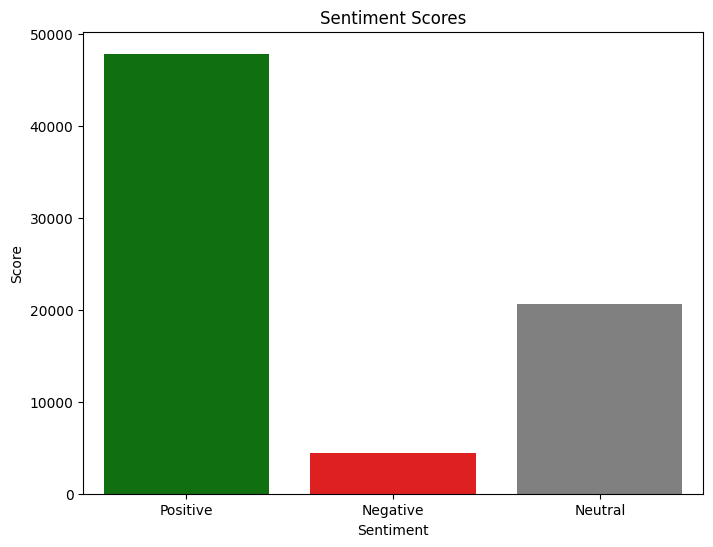

In [ ]:
# Bar plot of sentiment scores
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_labels, y=sentiment_counts, palette=['green', 'red', 'gray'])
plt.title('Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

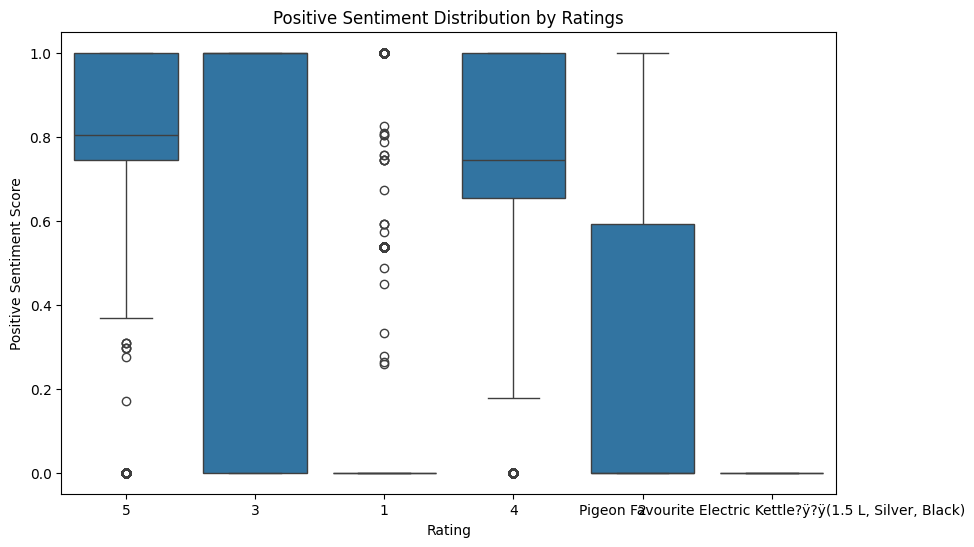

In [ ]:
# Analyze sentiment distribution by ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rate', y='Positive', data=data)
plt.title('Positive Sentiment Distribution by Ratings')
plt.xlabel('Rating')
plt.ylabel('Positive Sentiment Score')
plt.show()

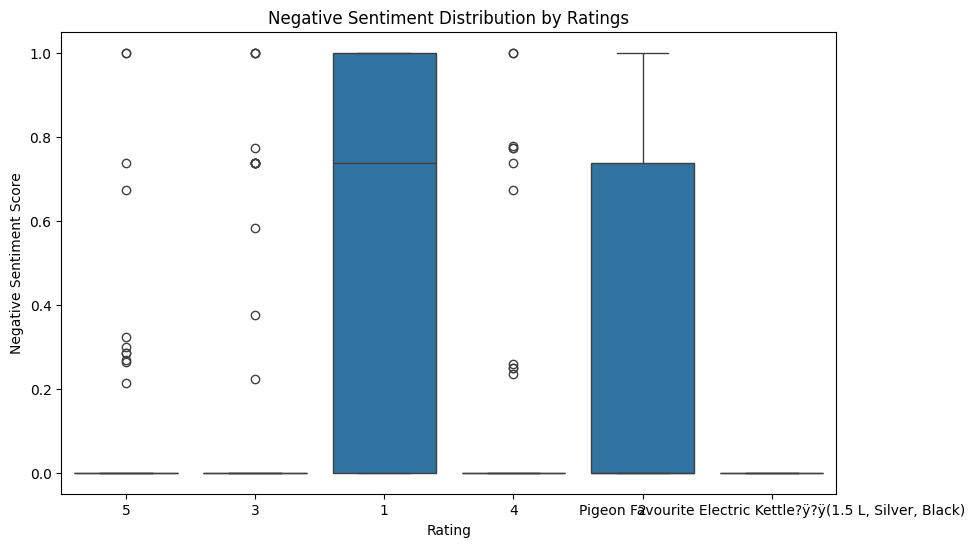

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rate', y='Negative', data=data)
plt.title('Negative Sentiment Distribution by Ratings')
plt.xlabel('Rating')
plt.ylabel('Negative Sentiment Score')
plt.show()

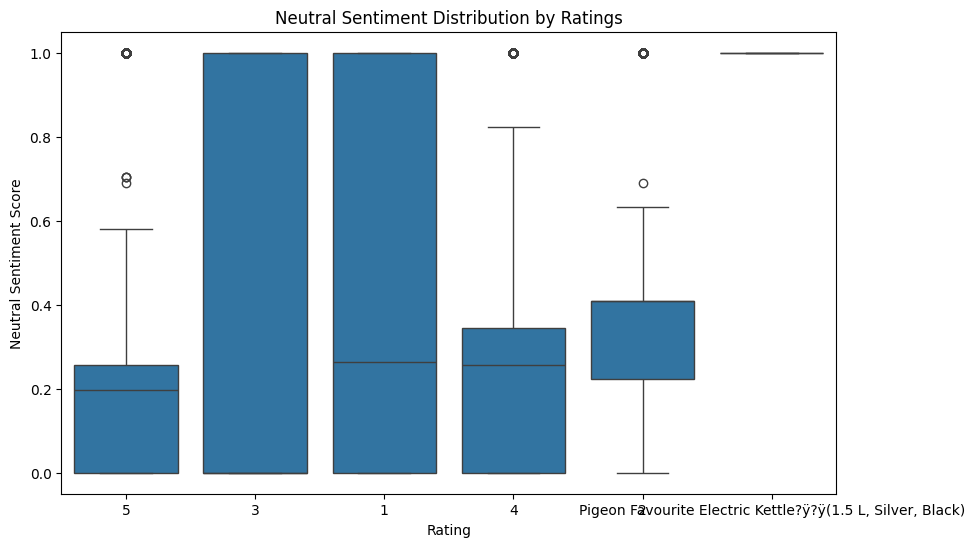

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rate', y='Neutral', data=data)
plt.title('Neutral Sentiment Distribution by Ratings')
plt.xlabel('Rating')
plt.ylabel('Neutral Sentiment Score')
plt.show()

In [ ]:
import plotly.express as px
figure = px.pie(data,
               values=quantity,
               names=numbers,hole=0.5)

figure.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

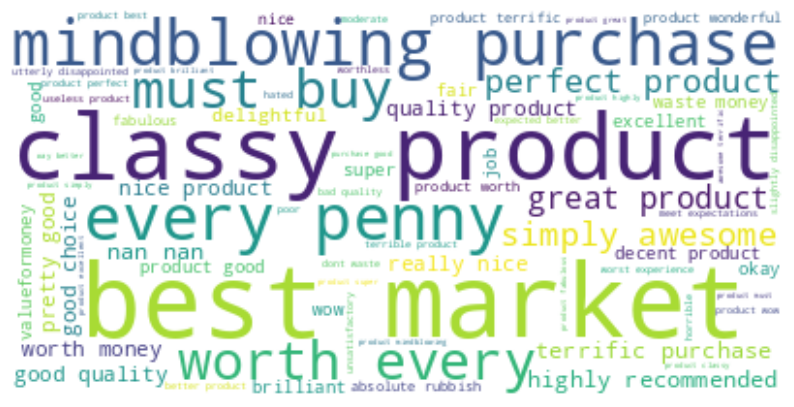

In [ ]:
#use a word cloud to visualize the most used words in the reviews column:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)

plt.figure(figsize=(10,15))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#Analyze the sentimates of Flipcart reviews by adding three columns in dataset as Positive,Negative and Neutral-
#by clustring the sentiment score of the review
nltk.download("vader_lexicon")
sentiments=SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]

data = data[["Review","Positive","Negative","Neutral"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data.head(5)

,Review,Positive,Negative,Neutral
0,super,1.0,0.000,0.000
1,awesome,1.0,0.000,0.000
2,fair,1.0,0.000,0.000
3,useless product,0.0,0.737,0.263
4,fair,1.0,0.000,0.000


In [19]:
#Now let's see how most of the reviewers think about the product Service of flipcart
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
    if (a>b) and (a>c):
            print("Positive 😀")
    elif (b>a) and (b>c):
            print("Negative 😡")
    elif (c>a) and (c>b):
            print("Neutral 😐")

In [20]:
sentiment_score(x,y,z)

Positive 😀


In [ ]:
#So most most of the reviews are Positive, let's have a look at the total of Positive, Negative and Neutral sentiment score-
#to find a conclusion about Flipcart reviews
print("Positive",x)
print("Negative",y)
print("Neutral",z)

Positive 47865.31599999343
Negative 4478.411000000013
Neutral 20603.27599999827


#K-Means Cluster

In [7]:
from sklearn.cluster import KMeans

In [21]:
# K-means clustering
X = data[['Positive', 'Negative', 'Neutral']]
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


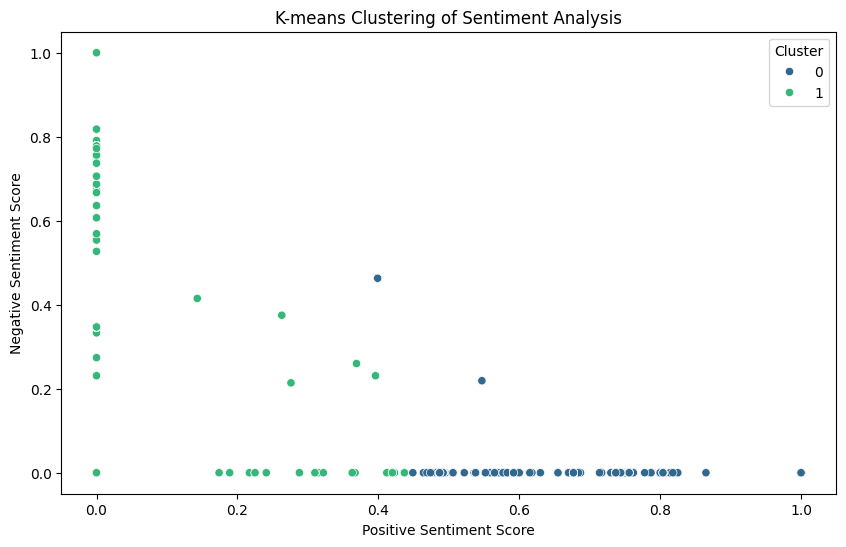

In [24]:
# Scatter plot of K-means clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Positive', y='Negative', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Sentiment Analysis')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Negative Sentiment Score')
plt.legend(title='Cluster')
plt.show()

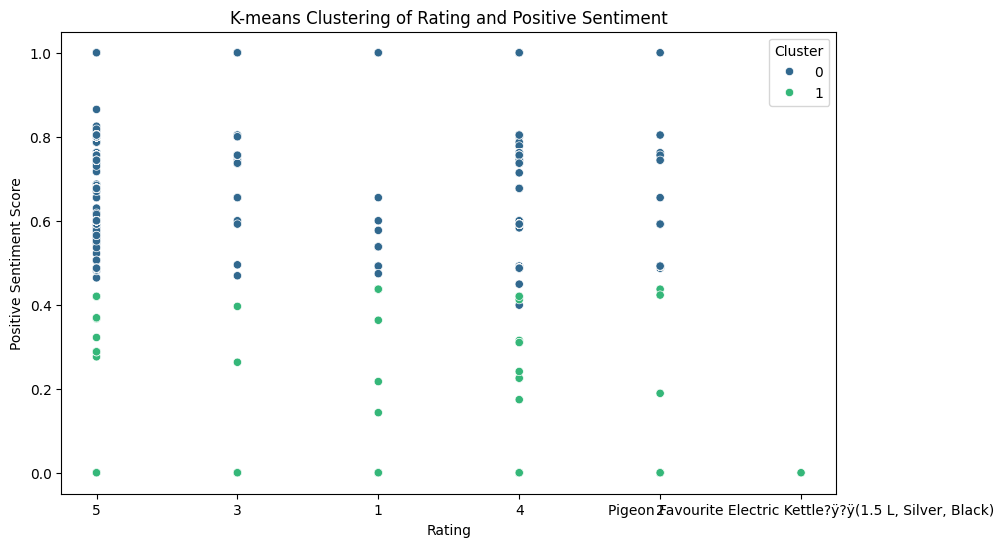

In [47]:
# Scatter plot of K-means clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rate', y='Positive', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Rating and Positive Sentiment')
plt.xlabel('Rating')
plt.ylabel('Positive Sentiment Score')
plt.legend(title='Cluster')
plt.show()


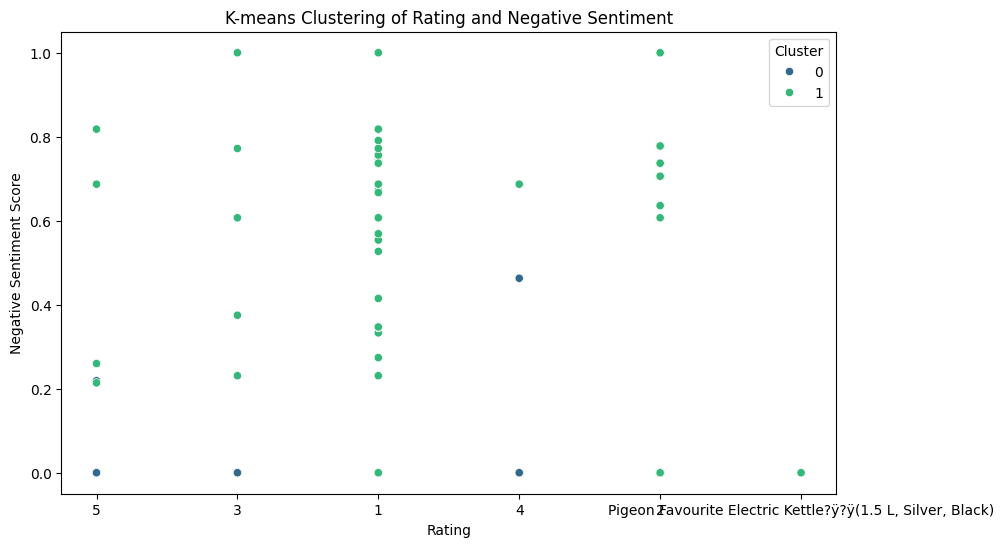

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rate', y='Negative', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Rating and Negative Sentiment')
plt.xlabel('Rating')
plt.ylabel('Negative Sentiment Score')
plt.legend(title='Cluster')
plt.show()

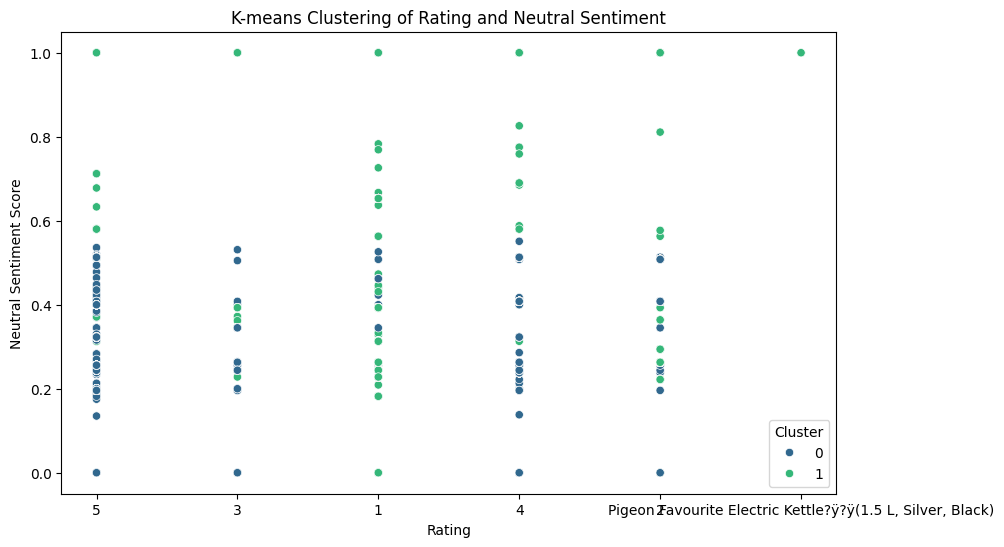

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rate', y='Neutral', hue='Cluster', data=data, palette='viridis')
plt.title('K-means Clustering of Rating and Neutral Sentiment')
plt.xlabel('Rating')
plt.ylabel('Neutral Sentiment Score')
plt.legend(title='Cluster')
plt.show()


In [22]:
# Counting the number of products labeled as 'super' and 'useless'
super_count = data[data['Cluster'] == 0]['Review'].count()
useless_count = data[data['Cluster'] == 1]['Review'].count()
print("Number of products labeled as 'super':", super_count)
print("Number of products labeled as 'useless':", useless_count)

Number of products labeled as 'super': 34998
Number of products labeled as 'useless': 10773


In [29]:
# Grouping data by clusters and counting the number of unique ratings within each cluster
cluster_rating_distribution = data.groupby('Cluster')['Rate'].value_counts().unstack(fill_value=0)
print("Distribution of Ratings within each Cluster:")
print(cluster_rating_distribution)


Distribution of Ratings within each Cluster:
Rate        1     2     3     4      5  \
Cluster                                  
0          12   508  2716  9054  22708   
1        4390  1111  1337  1007   2927   

Rate     Pigeon Favourite Electric Kettle?ÿ?ÿ(1.5 L, Silver, Black)  
Cluster                                                              
0                                                        0           
1                                                        1           


<ipython-input-59-ada965f99a5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Rate'], palette='viridis')


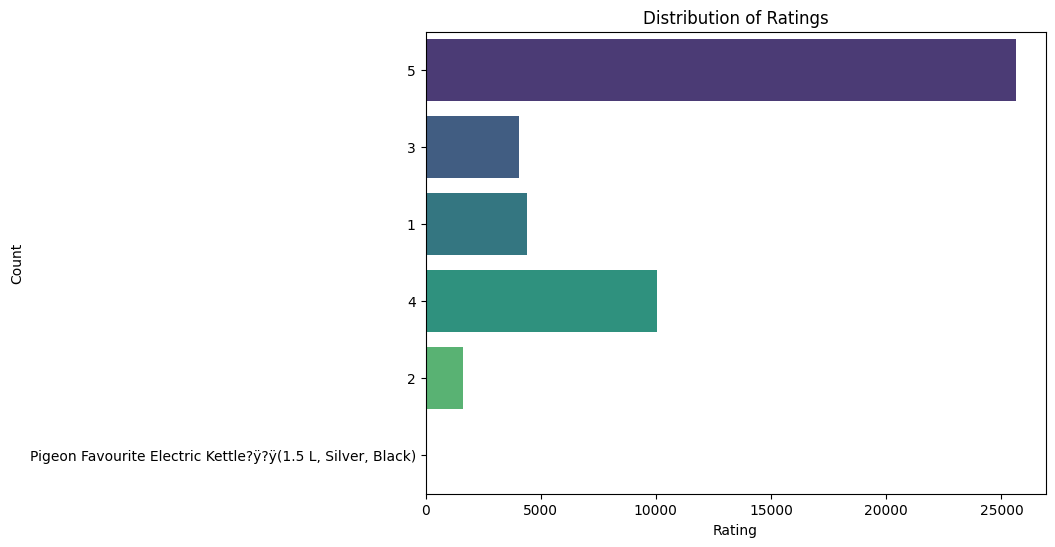


Examples of Reviews for Rating 1:
Review 1: useless product
Review 2: unsatisfactory
Review 3: waste money
Review 4: worthless
Review 5: worst experience ever
Review 6: like assembled one get  cheap quality
Review 7: horrible
Review 8: poor
Review 9: absolute rubbish
Review 10: hated
Review 11: terrible product
Review 12: recommended
Review 13: meet expectations
Review 14: utterly disappointed
Review 15: dont waste money
Review 16: product changed
Review 17: item good delhivery courier service worst
Review 18: worst delivery flipkart
Review 19: brilliant
Review 20: moderate
Review 21: could way better
Review 22: decent product
Review 23: absolute rubbish waste money bad
Review 24: cheating
Review 25: must buy
Review 26: best market
Review 27: reliable bad quality product
Review 28: bad decision buying plastic bucket cheap material
Review 29: damaged product
Review 30: bad
Review 31: slightly disappointed
Review 32: unclear specifications
Review 33: warranty fake
Review 34: superb perf

In [59]:
# Print distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data['Rate'], palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Define a function to plot example reviews for a specific rating
def plot_reviews_for_rating(data, rating):
    reviews = data[data['Rate'] == rating]['Review'].unique()
    print(f"\nExamples of Reviews for Rating {rating}:")
    for i, review in enumerate(reviews):
        print(f"Review {i+1}: {review}")
        print("========================================")
# Plot example reviews for each unique rating
unique_ratings = sorted(data['Rate'].unique())
for rating in unique_ratings:
    plot_reviews_for_rating(data, rating)